<a href="https://colab.research.google.com/github/samirrforredhat/migration_reporting/blob/master/decision_tree_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['jobs.csv']))
print(df)

Saving jobs.csv to jobs.csv
                            job_name  ...                                 successor
0   d1-limebtc-prepaid-precheck-load  ...              serialization_error_dont_run
1   d1-limebtc-prepaid-precheck-load  ...              serialization_error_dont_run
2   d1-limebtc-prepaid-precheck-load  ...              serialization_error_dont_run
3   d1-limebtc-prepaid-precheck-load  ...              serialization_error_dont_run
4   d1-limebtc-prepaid-precheck-load  ...              serialization_error_dont_run
5   d1-limebtc-prepaid-precheck-load  ...              serialization_error_dont_run
6   d1-limebtc-prepaid-precheck-load  ...                                     build
7   d1-limebtc-prepaid-precheck-load  ...              serialization_error_dont_run
8   d1-limebtc-prepaid-precheck-load  ...  check_log_rerun_if_no_other_load_running
9   d1-limebtc-prepaid-precheck-load  ...  check_log_rerun_if_no_other_load_running
10  d1-limebtc-prepaid-precheck-load  ...  check

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,job_name,runtime,status,dependent_job_running_job,successor
0,d1-limebtc-prepaid-precheck-load,0,scheduled,h1-columbus-data-load-from-s3,serialization_error_dont_run
1,d1-limebtc-prepaid-precheck-load,0,scheduled,h1-columbus-data-precheck-load,serialization_error_dont_run
2,d1-limebtc-prepaid-precheck-load,0,scheduled,Topup-recharge-load-20063,serialization_error_dont_run
3,d1-limebtc-prepaid-precheck-load,0,scheduled,a-6-independent-pid-data-load,serialization_error_dont_run
4,d1-limebtc-prepaid-precheck-load,0,scheduled,a-7-ODS-MMS-load,serialization_error_dont_run


In [ ]:
inputs = df

In [ ]:
inputs.head()

,job_name,runtime,status,dependent_job_running_job,successor
0,d1-limebtc-prepaid-precheck-load,0,scheduled,h1-columbus-data-load-from-s3,serialization_error_dont_run
1,d1-limebtc-prepaid-precheck-load,0,scheduled,h1-columbus-data-precheck-load,serialization_error_dont_run
2,d1-limebtc-prepaid-precheck-load,0,scheduled,Topup-recharge-load-20063,serialization_error_dont_run
3,d1-limebtc-prepaid-precheck-load,0,scheduled,a-6-independent-pid-data-load,serialization_error_dont_run
4,d1-limebtc-prepaid-precheck-load,0,scheduled,a-7-ODS-MMS-load,serialization_error_dont_run


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_job_name = LabelEncoder()
le_runtime = LabelEncoder()
le_status = LabelEncoder()
le_dependent_job_running_job = LabelEncoder()
le_successor = LabelEncoder()

In [ ]:
inputs['job_name_n'] = le_job_name.fit_transform(inputs['job_name'])
inputs['runtime_n'] = le_runtime.fit_transform(inputs['runtime'])
inputs['status_n'] = le_status.fit_transform(inputs['status'])
inputs['dependent_job_running_job_n'] = le_dependent_job_running_job.fit_transform(inputs['dependent_job_running_job'])
inputs['successor_n'] = le_successor.fit_transform(inputs['successor'])

In [ ]:
inputs

,job_name,runtime,status,dependent_job_running_job,successor,job_name_n,runtime_n,status_n,dependent_job_running_job_n,successor_n
0,d1-limebtc-prepaid-precheck-load,0,scheduled,h1-columbus-data-load-from-s3,serialization_error_dont_run,0,0,1,5,3
1,d1-limebtc-prepaid-precheck-load,0,scheduled,h1-columbus-data-precheck-load,serialization_error_dont_run,0,0,1,6,3
2,d1-limebtc-prepaid-precheck-load,0,scheduled,Topup-recharge-load-20063,serialization_error_dont_run,0,0,1,0,3
3,d1-limebtc-prepaid-precheck-load,0,scheduled,a-6-independent-pid-data-load,serialization_error_dont_run,0,0,1,1,3
4,d1-limebtc-prepaid-precheck-load,0,scheduled,a-7-ODS-MMS-load,serialization_error_dont_run,0,0,1,2,3
5,d1-limebtc-prepaid-precheck-load,0,scheduled,b1-0100-vlr-stats-load,serialization_error_dont_run,0,0,1,3,3
6,d1-limebtc-prepaid-precheck-load,0,scheduled,others,build,0,0,1,7,0
7,d1-limebtc-prepaid-precheck-load,0,scheduled,c1-0100-liberate-landing-load job,serialization_error_dont_run,0,0,1,4,3
8,d1-limebtc-prepaid-precheck-load,1,failed,h1-columbus-data-load-from-s3,check_log_rerun_if_no_other_load_running,0,1,0,5,2
9,d1-limebtc-prepaid-precheck-load,1,failed,h1-columbus-data-precheck-load,check_log_rerun_if_no_other_load_running,0,1,0,6,2


In [ ]:
target_n = inputs['successor_n']

In [ ]:
inputs_n = inputs.drop(['job_name',	'runtime',	'status',	'dependent_job_running_job'	,'successor','successor_n'], axis='columns')

In [ ]:
inputs_n

,job_name_n,runtime_n,status_n,dependent_job_running_job_n
0,0,0,1,5
1,0,0,1,6
2,0,0,1,0
3,0,0,1,1
4,0,0,1,2
5,0,0,1,3
6,0,0,1,7
7,0,0,1,4
8,0,1,0,5
9,0,1,0,6


In [ ]:
target_n

0     3
1     3
2     3
3     3
4     3
5     3
6     0
7     3
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    1
16    1
17    1
Name: successor_n, dtype: int64

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs_n, target_n)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(inputs_n,target_n)


1.0

In [ ]:
model.predict([[0,3,0,7]])


array([1])

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# Prepare the data data

X = inputs_n
y = target_n
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

[Text(167.4, 181.2, 'X[2] <= 0.5\ngini = 0.667\nsamples = 18\nvalue = [1, 3, 7, 7]'),
 Text(83.7, 108.72, 'X[3] <= 6.5\ngini = 0.42\nsamples = 10\nvalue = [0, 3, 7, 0]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 6.5\ngini = 0.219\nsamples = 8\nvalue = [1, 0, 0, 7]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 7]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]')]

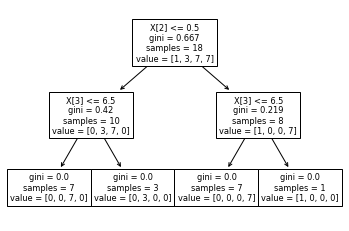

In [ ]:
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

 **---Testing follows----**

In [ ]:
le_dependent_job_running_job.classes_

In [ ]:
en_dj_rj = le_dependent_job_running_job.transform([user_input_dj_rj])

In [ ]:
le_dependent_job_running_job.inverse_transform([1])

array(['a-6-independent-pid-data-load'], dtype=object)

In [ ]:
int(dp)

In [ ]:
le_job_name
le_runtime
le_status
le_dependent_job_running_job
le_successor

In [ ]:
user_input_dj_rj = input("Enter the job name:")

In [ ]:
user_input_dj_rj

In [ ]:
pre = model.predict([[0,0,1,7]])

In [ ]:
int(pre)
result = le_successor.inverse_transform([int(pre)])
print(result)

In [ ]:
job_name = "d1-limebtc-prepaid-precheck-load" #@param ["d1-limebtc-prepaid-precheck-load"]
print("\033[1m  Job name   \033[0m                    : ", job_name)

runtime = "1" #@param ["0", "1", "30", "60"]
print("\033[1m  Runtime   \033[0m                     : ",  runtime)

status = "failed" #@param ["schedled", "failed"]
print("\033[1m  Status  \033[0m                       : ",status)

dependent_job_running_job = "a-6-independent-pid-data-load" #@param ["h1-columbus-data-load-from-s3","h1-columbus-data-precheck-load","Topup-recharge-load-20063","a-6-independent-pid-data-load","a-7-ODS-MMS-load","b1-0100-vlr-stats-load","c1-0100-liberate-landing-load job"]
print("\033[1m  Dependent Job or Running Job  \033[0m : ",dependent_job_running_job)

print("\033[1m  Recommended Workaround  \033[0m       : ")

  Job name                       :  d1-limebtc-prepaid-precheck-load
  Runtime                        :  0
  Status                         :  schedled
  Dependent Job or Running Job   :  h1-columbus-data-load-from-s3
  Recommended Workaround         : 
